# Generating Sign Language Images with DCGAN
## Arda Mavi

### Summary:
Generating sign language images with 'DCGAN' using our own 'Sign Language Dataset'.

#### DCGAN Paper: [arxiv.org/abs/1511.06434](https://arxiv.org/abs/1511.06434)
#### Sign Language Dataset: [github.com/ardamavi/Sign-Language-Digits-Dataset](https://github.com/ardamavi/Sign-Language-Digits-Dataset)

In [1]:
# Import
import os
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Getting Dataset:
from get_dataset import get_dataset
X_train = get_dataset()

Dataset shape: (2062, 64, 64, 1)
2062 sample, 64 x 64 size grayscale image.

Examples:


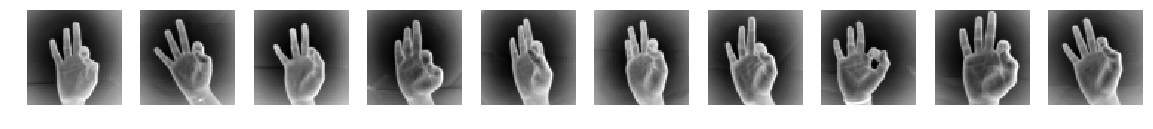

In [3]:
# About Dataset:

img_size = X_train.shape[1] # 64
channel_size = X_train.shape[3] # 1: Grayscale, 3: RGB

print('Dataset shape:', X_train.shape)
print(X_train.shape[0], 'sample,',X_train.shape[1] ,'x',X_train.shape[2] ,'size grayscale image.\n')

print('Examples:')
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n+1):
    # Display data:
    ax = plt.subplot(1, n, i)
    plt.imshow(X_train[i].reshape(img_size, img_size))
    plt.gray()
    plt.axis('off')

In [4]:
# Import Deep Learning libraries:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dense, Activation, Lambda, Flatten, concatenate, Reshape
from keras.models import Model
from keras import backend as K

### Generator Architecture:

In [5]:
input_noise = Input(shape=(100,))

G_fc = Dense(256)(input_noise)
G_fc = Activation('relu')(G_fc)

G_fc = Dense(8*8*256)(G_fc)
G_fc = Activation('relu')(G_fc)

G_rs = Reshape((8, 8, 256))(G_fc)

G_layer = UpSampling2D((2, 2))(G_rs)
G_layer = Conv2D(256, (3, 3), activation='relu', padding='same')(G_layer)

G_layer = UpSampling2D((2, 2))(G_layer)
G_layer = Conv2D(128, (3, 3), activation='relu', padding='same')(G_layer)

G_layer = UpSampling2D((2, 2))(G_layer)
G_layer = Conv2D(64, (3, 3), activation='relu', padding='same')(G_layer)

G_output = Conv2D(channel_size, (3, 3), activation='sigmoid', padding='same')(G_layer)


# Compile Generator:

generator = Model(input_noise, G_output)

print('Generator Architecture:')
generator.summary()

Generator Architecture:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 16384)             4210688   
_________________________________________________________________
activation_2 (Activation)    (None, 16384)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 8, 8, 256)         0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 16, 16, 256)    

### Discriminator Architecture:

In [6]:
input_img = Input(shape=(img_size, img_size, channel_size))

D_layer = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
D_layer = MaxPooling2D((2, 2))(D_layer)

D_layer = Conv2D(64, (3, 3), activation='relu', padding='same')(D_layer)
D_layer = MaxPooling2D((2, 2))(D_layer)

D_layer = Conv2D(128, (3, 3), activation='relu', padding='same')(D_layer)
D_layer = MaxPooling2D((2, 2))(D_layer)

D_flt = Flatten()(D_layer)

D_fc = Dense(256)(D_flt)
D_fc = Activation('relu')(D_fc)

D_fc = Dense(128)(D_fc)
D_fc = Activation('relu')(D_fc)

D_fc = Dense(1)(D_fc)
D_output = Activation('sigmoid')(D_fc)


# Compile Discriminator:

discriminator = Model(input_img, D_output)
discriminator.compile(optimizer='adadelta', loss='mse', metrics=['accuracy'])

print('Discriminator Architecture:')
discriminator.summary()

Discriminator Architecture:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 128)  

### DCGAN Architecture:

In [7]:
# DCGAN:

input_dcgan = Input(shape=(100,))
generated_img = generator(input_dcgan)
dcgan_output = discriminator(generated_img)

# Compile DCGAN:

dcgan = Model(input_dcgan, dcgan_output)
dcgan.compile(optimizer='adadelta', loss='mse', metrics=['accuracy'])

print('DCGAN Architecture:')
dcgan.summary()

DCGAN Architecture:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 100)               0         
_________________________________________________________________
model_1 (Model)              (None, 64, 64, 1)         5196033   
_________________________________________________________________
model_2 (Model)              (None, 1)                 2223105   
Total params: 7,419,138
Trainable params: 7,419,138
Non-trainable params: 0
_________________________________________________________________


### Training:



Epoch: 1 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0951 - acc: 0.8933

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 12s 6ms/step - loss: 0.0181 - acc: 0.9845

Generated Examples:


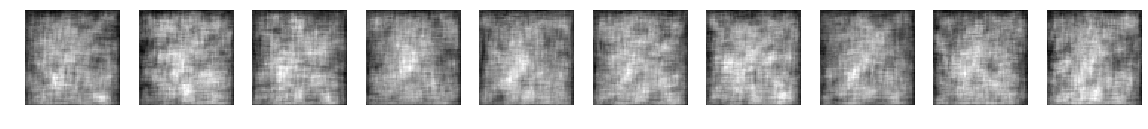



Epoch: 2 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 879us/step - loss: 0.1149 - acc: 0.8885

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0285 - acc: 0.9690

Generated Examples:


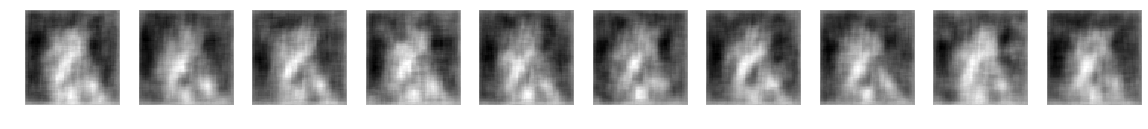



Epoch: 3 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 863us/step - loss: 0.0219 - acc: 0.9767

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0180 - acc: 0.9821

Generated Examples:


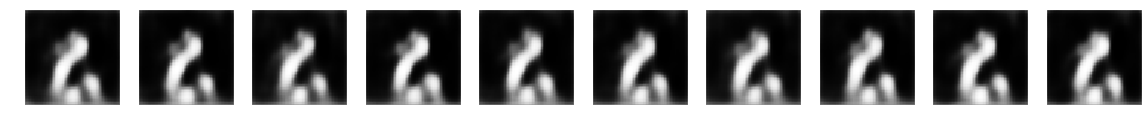



Epoch: 4 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 880us/step - loss: 0.5000 - acc: 0.5000

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 5.7330e-11 - acc: 1.0000

Generated Examples:


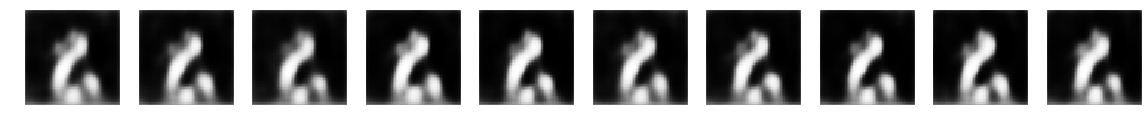



Epoch: 5 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 871us/step - loss: 0.5000 - acc: 0.5000

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 4.1046e-09 - acc: 1.0000

Generated Examples:


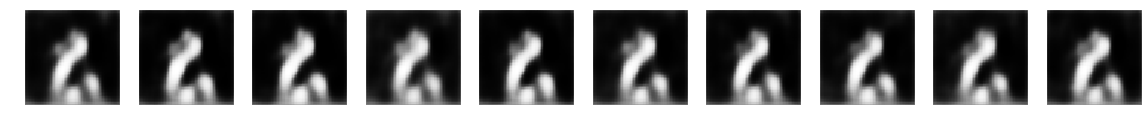



Epoch: 6 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 881us/step - loss: 0.1519 - acc: 0.8210

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0150 - acc: 0.9845

Generated Examples:


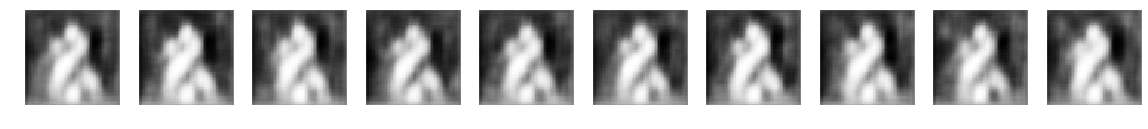



Epoch: 7 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 878us/step - loss: 0.0310 - acc: 0.9646

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0157 - acc: 0.9845

Generated Examples:


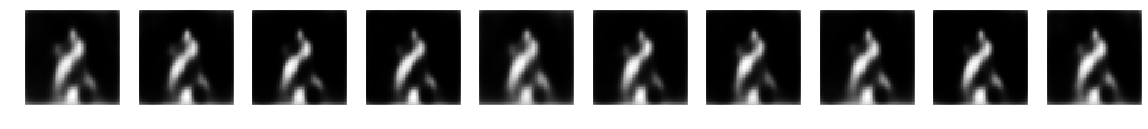



Epoch: 8 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 870us/step - loss: 0.0425 - acc: 0.9564

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0156 - acc: 0.9845

Generated Examples:


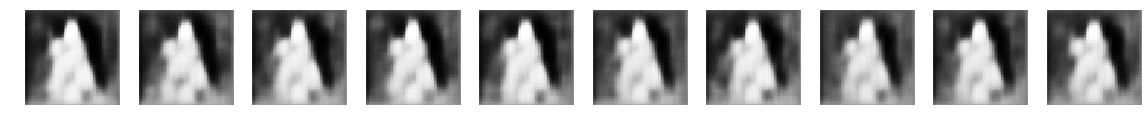



Epoch: 9 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 867us/step - loss: 0.5000 - acc: 0.5000

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 7.9050e-12 - acc: 1.0000

Generated Examples:


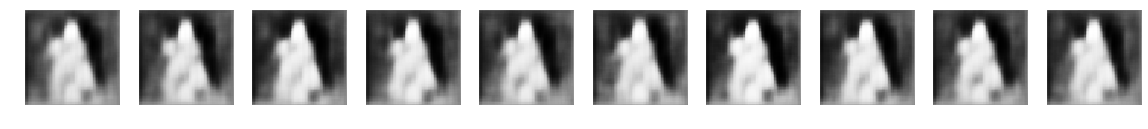



Epoch: 10 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 868us/step - loss: 0.5000 - acc: 0.5000

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 5.3238e-10 - acc: 1.0000

Generated Examples:


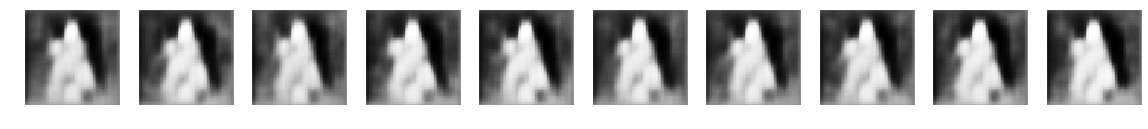



Epoch: 11 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 881us/step - loss: 0.1199 - acc: 0.8725

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0150 - acc: 0.9845

Generated Examples:


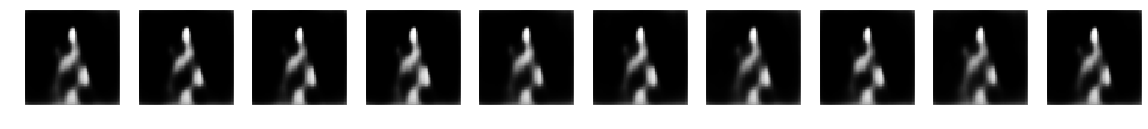



Epoch: 12 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 864us/step - loss: 0.1088 - acc: 0.8865

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0168 - acc: 0.9845

Generated Examples:


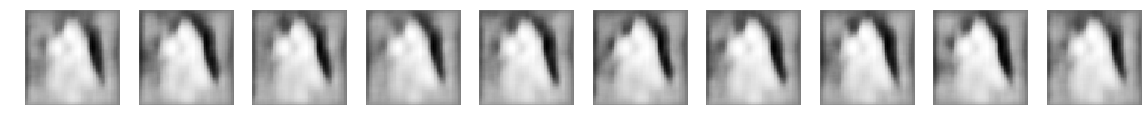



Epoch: 13 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 869us/step - loss: 0.0390 - acc: 0.9607

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0153 - acc: 0.9845

Generated Examples:


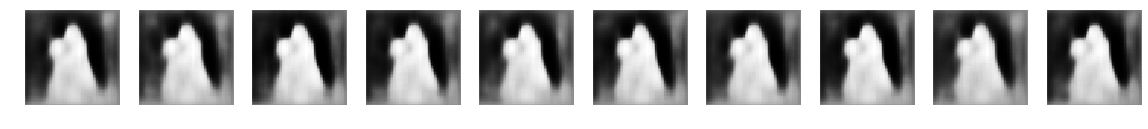



Epoch: 14 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 862us/step - loss: 0.0294 - acc: 0.9704

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0153 - acc: 0.9845

Generated Examples:


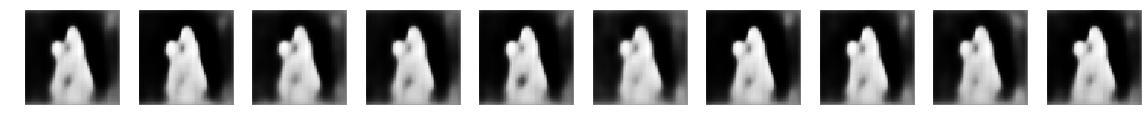



Epoch: 15 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 867us/step - loss: 0.0355 - acc: 0.9622

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0152 - acc: 0.9845

Generated Examples:


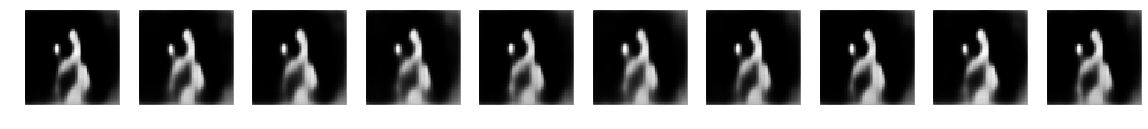



Epoch: 16 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 855us/step - loss: 0.0503 - acc: 0.9467

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0151 - acc: 0.9845

Generated Examples:


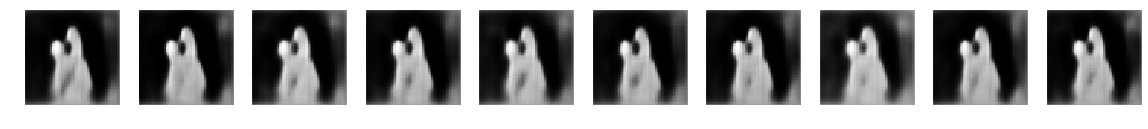



Epoch: 17 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 865us/step - loss: 0.0271 - acc: 0.9728

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0151 - acc: 0.9845

Generated Examples:


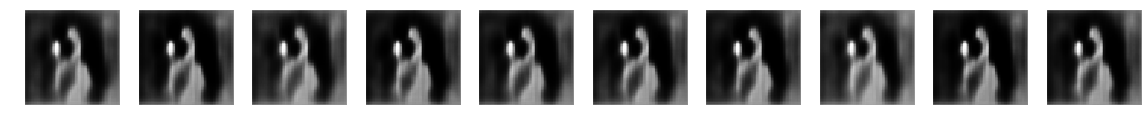



Epoch: 18 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 883us/step - loss: 0.0336 - acc: 0.9617

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0152 - acc: 0.9845

Generated Examples:


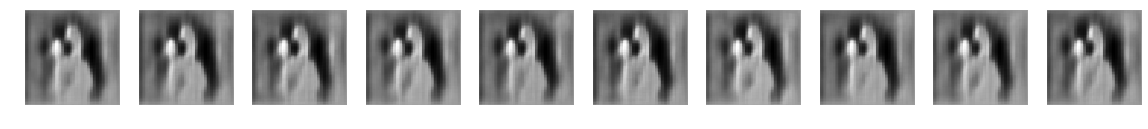



Epoch: 19 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 856us/step - loss: 0.0422 - acc: 0.9568

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0179 - acc: 0.9845

Generated Examples:


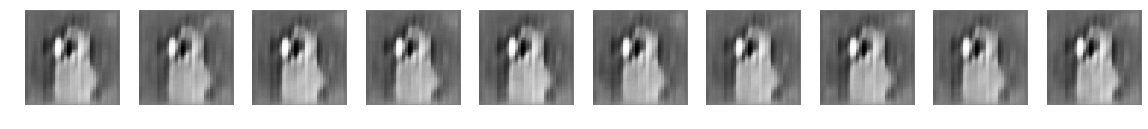



Epoch: 20 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 872us/step - loss: 0.5000 - acc: 0.5000

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 8.7059e-10 - acc: 1.0000

Generated Examples:


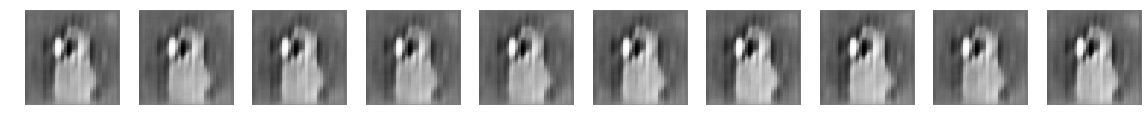



Epoch: 21 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 865us/step - loss: 0.2356 - acc: 0.7604

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0152 - acc: 0.9845

Generated Examples:


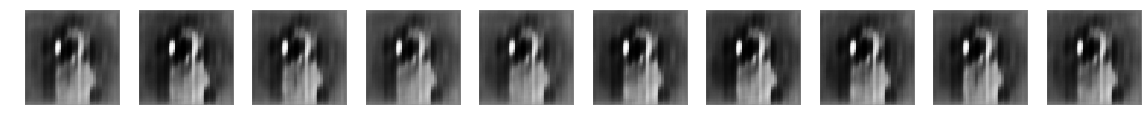



Epoch: 22 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 870us/step - loss: 0.0550 - acc: 0.9399

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0153 - acc: 0.9845

Generated Examples:


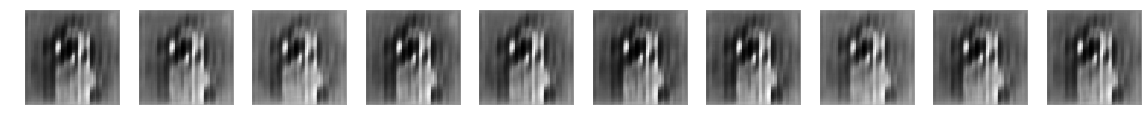



Epoch: 23 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 858us/step - loss: 0.0359 - acc: 0.9631

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0152 - acc: 0.9845

Generated Examples:


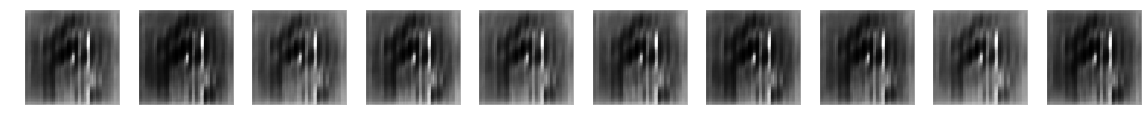



Epoch: 24 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 864us/step - loss: 0.0564 - acc: 0.9447

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0151 - acc: 0.9845

Generated Examples:


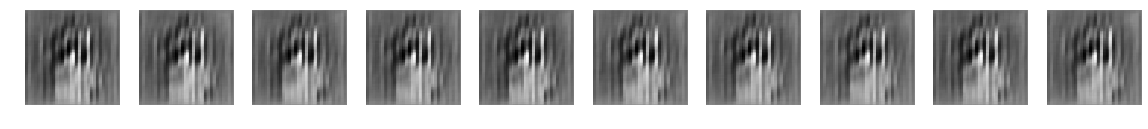



Epoch: 25 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 874us/step - loss: 0.0360 - acc: 0.9622

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


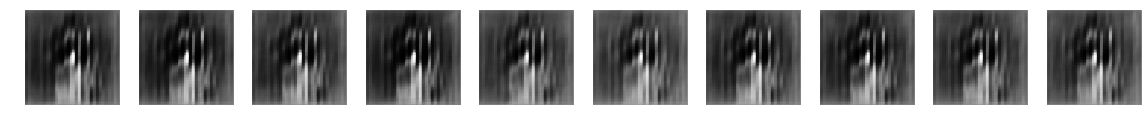



Epoch: 26 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 867us/step - loss: 0.0377 - acc: 0.9612

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0150 - acc: 0.9845

Generated Examples:


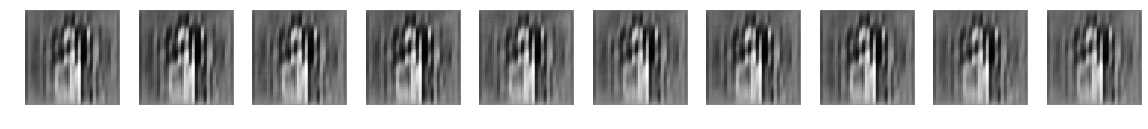



Epoch: 27 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 866us/step - loss: 0.0430 - acc: 0.9554

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0155 - acc: 0.9845

Generated Examples:


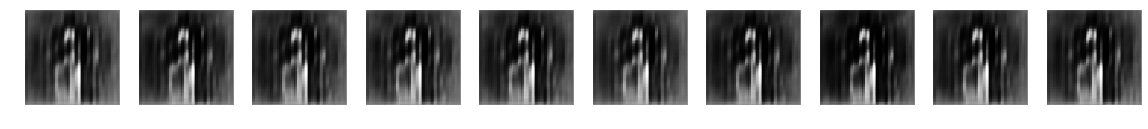



Epoch: 28 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 866us/step - loss: 0.0381 - acc: 0.9573

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0161 - acc: 0.9835

Generated Examples:


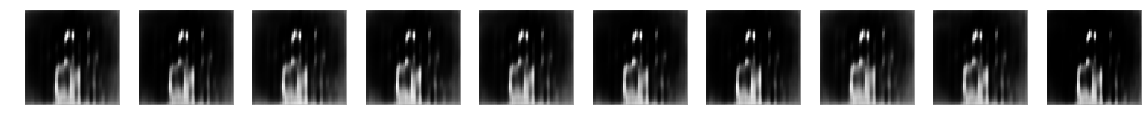



Epoch: 29 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 874us/step - loss: 0.0363 - acc: 0.9597

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0156 - acc: 0.9845

Generated Examples:


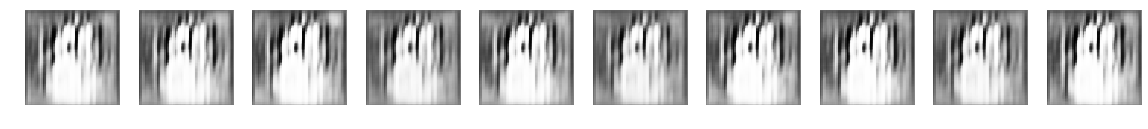



Epoch: 30 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 851us/step - loss: 0.0301 - acc: 0.9690

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


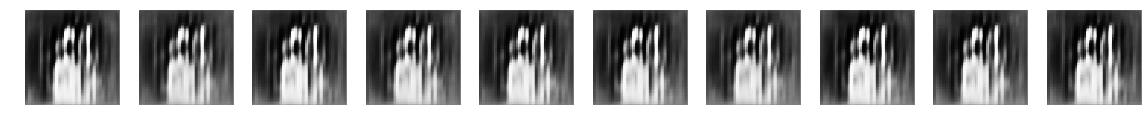



Epoch: 31 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 867us/step - loss: 0.0489 - acc: 0.9496

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0153 - acc: 0.9845

Generated Examples:


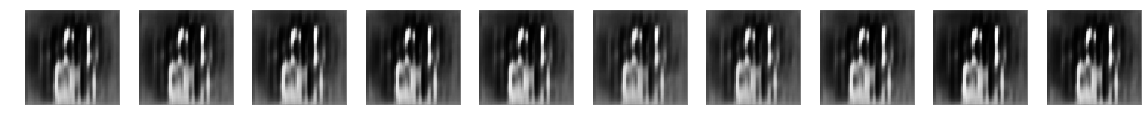



Epoch: 32 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 872us/step - loss: 0.0248 - acc: 0.9748

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


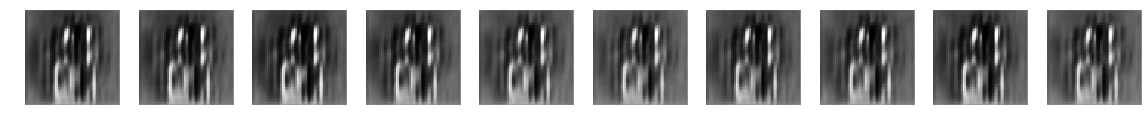



Epoch: 33 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 869us/step - loss: 0.0236 - acc: 0.9762

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


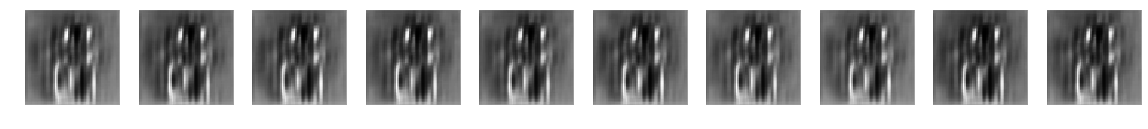



Epoch: 34 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 872us/step - loss: 0.0290 - acc: 0.9651

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0166 - acc: 0.9840

Generated Examples:


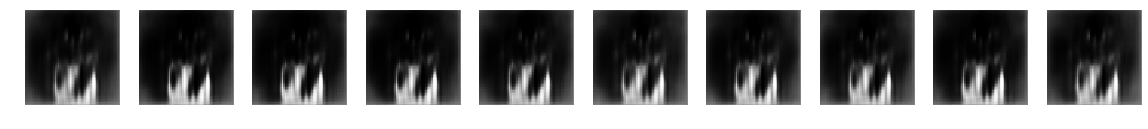



Epoch: 35 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 864us/step - loss: 0.0272 - acc: 0.9724

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0225 - acc: 0.9719

Generated Examples:


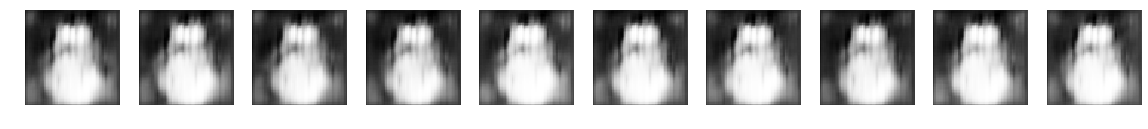



Epoch: 36 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 868us/step - loss: 0.0222 - acc: 0.9743

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0334 - acc: 0.9690

Generated Examples:


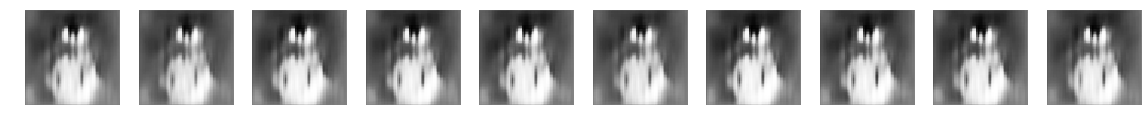



Epoch: 37 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 855us/step - loss: 0.0441 - acc: 0.9573

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0157 - acc: 0.9845

Generated Examples:


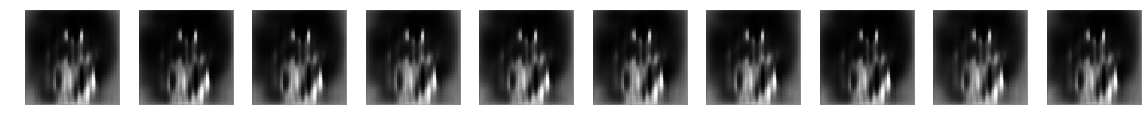



Epoch: 38 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 898us/step - loss: 0.5000 - acc: 0.5000

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 8.5090e-11 - acc: 1.0000

Generated Examples:


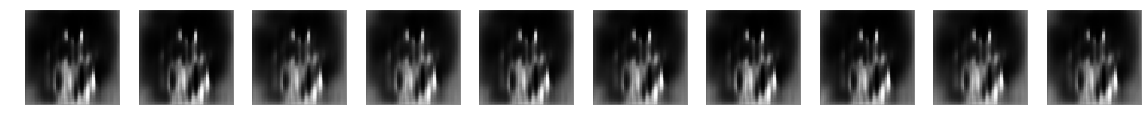



Epoch: 39 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 860us/step - loss: 0.5000 - acc: 0.5000

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 7.6519e-10 - acc: 1.0000

Generated Examples:


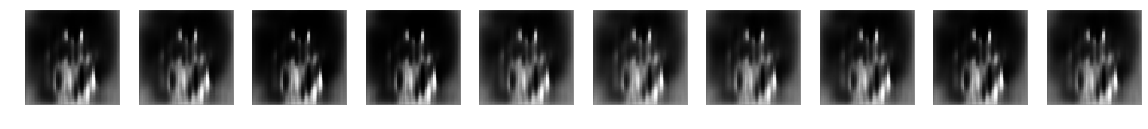



Epoch: 40 / 40

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 863us/step - loss: 0.2157 - acc: 0.7774

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0151 - acc: 0.9845

Generated Examples:


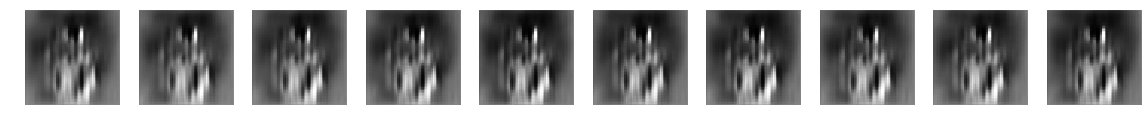

In [8]:
epochs = 40
train_data_size = int(X_train.shape[0]/2)

for epoch in range(epochs):
  
    print('\n\nEpoch:', epoch+1, '/', epochs)
    
    # Discriminator Training:
    
    # Getting real batch:
    real_imgs_indexes = np.random.randint(0, X_train.shape[0], train_data_size)
    real_imgs = X_train[real_imgs_indexes]
    
    # Getting generated batch:
    noise = np.random.normal(0, 1, (train_data_size, 100))
    generator_imgs = generator.predict(noise)
    
    # Getting batch:
    dis_batch = np.concatenate((real_imgs, generator_imgs), axis=0)
    dis_batch_Y = np.concatenate((np.ones((train_data_size, 1)), np.zeros((train_data_size, 1))), axis=0)
    
    discriminator.trainable = True
    print('\nDiscriminator Train:')
    discriminator.fit(dis_batch, dis_batch_Y, batch_size=32, epochs=1, shuffle=True)
    
    
    # Generator Training:
    
    noise = np.random.normal(0, 1, (train_data_size*2, 100))
    
    gen_batch_Y = np.ones((train_data_size*2, 1))
    
    discriminator.trainable = False
    print('\nDCGAN Train:')
    dcgan.fit(noise, gen_batch_Y, batch_size=32, epochs=1, shuffle=True)
    
    print('\nGenerated Examples:')
    n = 10
    plt.figure(figsize=(20, 2))
    for i in range(1, n+1):
        ax = plt.subplot(1, n, i)
        noise = np.random.normal(0, 1, (1, 100))
        plt.imshow(generator.predict(noise).reshape(img_size, img_size))
        plt.gray()
        plt.axis('off')
    plt.show()

### Save and get  models functions:

In [9]:
# Save Models:
def save_models(dcgan, generator, discriminator):
    
    if not os.path.exists('Data/Models/'):
        os.makedirs('Data/Models/')
        
    model_json = dcgan.to_json()
    with open("Data/Models/dcgan_model.json", "w") as model_file:
        model_file.write(model_json)
    dcgan.save_weights("Data/Models/dcgan_weights.h5")
    
    model_json = generator.to_json()
    with open("Data/Models/generator_model.json", "w") as model_file:
        model_file.write(model_json)
    generator.save_weights("Data/Models/generator_weights.h5")
    
    model_json = discriminator.to_json()
    with open("Data/Models/discriminator_model.json", "w") as model_file:
        model_file.write(model_json)
    discriminator.save_weights("Data/Models/discriminator_weights.h5")
    
    print('Models and weights saved')
    return



# Get Models:
from keras.models import model_from_json

def get_models():
    with open('Data/Models/dcgan_model.json', 'r') as model_file:
        dcgan = model_from_json(model_file.read())
    dcgan.load_weights("Data/Models/dcgan_weights.h5")

    with open('Data/Models/generator_model.json', 'r') as model_file:
        generator = model_from_json(model_file.read())
    generator.load_weights("Data/Models/generator_weights.h5")

    with open('Data/Models/discriminator_model.json', 'r') as model_file:
        discriminator = model_from_json(model_file.read())
    discriminator.load_weights("Data/Models/discriminator_weights.h5")
    return dcgan, generator, discriminator

In [10]:
# Save models:
save_models(dcgan, generator, discriminator)

Models and weights saved


In [11]:
dcgan, generator, discriminator = get_models()

Generated Examples:


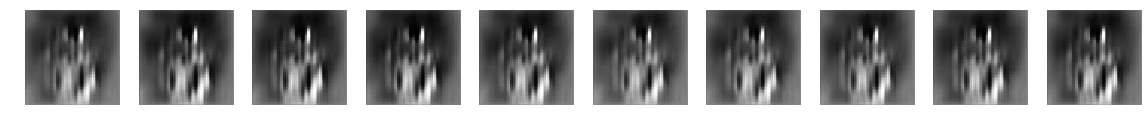

In [12]:
print('Generated Examples:')
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n+1):
    ax = plt.subplot(1, n, i)
    noise = K.variable(np.random.normal(0, 1, (1, 100)))
    exmpl_gen_img = K.eval(generator(noise))
    plt.imshow(exmpl_gen_img.reshape(img_size, img_size))
    plt.gray()
    plt.axis('off')
plt.show()